In [11]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import f ## distribución F
from scipy.stats import ttest_1samp  ## Prueba t una población
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
from sklearn.linear_model import Lasso
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot

# Punto 2

El conjunto de datos “YearPredictionMSD” contiene información sobre canciones de música popular y el año en que se grabaron. Incluye 515345 observaciones y 90 características, como la intensidad media del sonido, la varianza del espectro de frecuencia y la correlación entre las características espectrales. El objetivo es predecir el año en que se grabó la canción.

- Carque el conjunto de datos usando la función read_csv del paquete pandas y el como primer argumento el link https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip, use como segundo argumendo header = None.
- Divida el conjunto de datos en características o variables explicativas X y variable objetivo Y, tenga en cuenta que se quiere modelar el año en que se grabó la canción.
- Reduzca la dimensión de las variables. Para ello, use un modelo de regresión LASSO con un coeficiente de penalización de 10, para extraer características importantes del conjunto de variables explicativas.
- Con el conjunto de variables reducido, ajuste un modelo de regresión OLS e interprete su significancia y su R cuadrado ajustado.
- Revise los supuestos de los errores, y con los hallazgos del ítem anterior, concluya sobre la conveniencia de usar este modelo para predecir el año de grabación de la canción.

In [ ]:
import requests
import zipfile
import pandas as pd
from io import BytesIO

# URL del archivo ZIP
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"

# Descargar el archivo ZIP
response = requests.get(url)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Crear un objeto ZipFile a partir de los datos descargados
    with zipfile.ZipFile(BytesIO(response.content)) as zip_file:
        # Extraer el nombre del primer archivo en el ZIP (suponiendo que es el archivo CSV)
        csv_file = zip_file.namelist()[0]
        # Leer el archivo CSV directamente desde el objeto ZipFile
        with zip_file.open(csv_file) as file:
            # Leer el archivo CSV con pandas
            data = pd.read_csv(file, sep=",", header=None)
            print(data.head())
else:
    print("Error al descargar el archivo ZIP:", response.status_code)

## 2.1
Carque el conjunto de datos usando la función read_csv del paquete pandas y el como primer argumento el link https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip, use como segundo argumendo header = None.

In [6]:
data = pd.read_csv("YearPredictionMSD.txt", sep = ",", header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-null  float64
 21  21      51

Al visualizar el archivo se pueden ver las 90 caracteristicas y las 515345 observaciones o registros. La columna cero haría referencia a la variable año segun la información observada, además es la única que es tipo int, el resto todas son float que tienen valores decimales al igual que valores positivos y negativos.

Adicionalmente se puede observar que no hay valores nulos en el dataset.

In [18]:
# Eliminar la primera columna del DataFrame
data_variables = data.drop(0, axis=1)

# Obtener la cantidad de columnas del DataFrame sin la primera columna
num_variables = data_variables.shape[1]

# Imprimir la cantidad de columnas del DataFrame sin la primera columna
print("Cantidad de atributos de variable x en el DataFrame inicialmente son:", num_variables)

Cantidad de atributos de variable x en el DataFrame inicialmente son: 90


## 2.2 y 2.3

Divida el conjunto de datos en características o variables explicativas X y variable objetivo Y, tenga en cuenta que se quiere modelar el año en que se grabó la canción.

Reduzca la dimensión de las variables. Para ello, use un modelo de regresión LASSO con un coeficiente de penalización de 10, para extraer características importantes del conjunto de variables explicativas.

In [12]:
# Dividir los datos en variables independientes (X) y la variable dependiente (y)
y = data[0]
X = data.drop(0, axis=1)

# Luego se crea un modelo de regresión LASSO con un coeficiente de penalización de 10
lasso_model = Lasso(alpha=10)

# Lo siguiente es ajustar el modelo a los datos
lasso_model.fit(X, y)

# Obtener las características seleccionadas por el modelo
selected_features = X.columns[lasso_model.coef_ != 0]

# Filtrar el conjunto de datos original para incluir solo las características seleccionadas
X_selected = X[selected_features]

In [14]:
# Obtener los coeficientes del modelo
coefficients = lasso_model.coef_

# Obtener el índice de las características seleccionadas (aquellas con coeficientes no nulos)
selected_features_index = [i for i, coef in enumerate(coefficients) if coef != 0]

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selected_features_index]

# Obtener el número total de características seleccionadas
total_selected_features = len(selected_features_index)

# Imprimir el número total de características seleccionadas
print("Número total de características seleccionadas:", total_selected_features)

# Imprimir las características seleccionadas
print("Características seleccionadas:")
print(selected_features)

Número total de características seleccionadas: 50
Características seleccionadas:
Index([ 1,  2,  3,  6, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 31, 33,
       36, 37, 38, 39, 40, 41, 43, 47, 48, 50, 52, 57, 58, 59, 60, 63, 64, 65,
       68, 69, 72, 73, 74, 75, 77, 78, 82, 83, 84, 86, 87, 89],
      dtype='int64')


Como resultado se observa que luego de aplicar LASSO con un coeficiente de penalización de 10, el número de variables se reduce de 90 a 50 y puntualmente se muestra cuales son las posiciones dentro del dataset de las variables escogidas

## 2.4

Con el conjunto de variables reducido, ajuste un modelo de regresión OLS e interprete su significancia y su R cuadrado ajustado.

In [21]:
import statsmodels.api as sm

# Ajustar un modelo de regresión OLS con las variables seleccionadas
X_selected = data[selected_features]
X_selected = sm.add_constant(X_selected)  # Agregar una columna de unos para el término de intercepción
model_ols = sm.OLS(y, X_selected)
results_ols = model_ols.fit()

# Imprimir el resumen del modelo
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     2946.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        13:59:33   Log-Likelihood:            -1.8990e+06
No. Observations:              515345   AIC:                         3.798e+06
Df Residuals:                  515294   BIC:                         3.799e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1954.2657      0.178    1.1e+04      0.0

Análisis 1: 

Un R cuadrado ajustado de 0.22 indica que aproximadamente el 22% de la variabilidad en la variable dependiente Y (Es decir el Año) se explica por las variables independientes seleccionadas en el modelo de regresión lineal ordinaria (OLS) después de aplicar LASSO para la selección de características (que en total fueron 50).

Esto significa que el modelo explica una fracción modesta de la variabilidad en la variable dependiente, lo que sugiere que podría haber otros factores que contribuyen a la variabilidad no capturada por las variables seleccionadas en el modelo.

En cuanto a la significancia de las variables escogidas puedo interpretar lo siguiente:

Para aquellas variables que presentan un Valor p < 0.05, generalmente indica una evidencia suficiente para rechazar la hipótesis nula y se interpreta como que la variable es estadísticamente significativa en el modelo. En otras palabras, hay evidencia suficiente para decir que la variable tiene un efecto significativo en la variable dependiente Y. Esto fue el caso de la gran mayoria de variables escogidas.

Por otro lado aquellas variables que presentan un Valor p > 0.05, sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de que el coeficiente asociado con la variable es igual a cero. En este caso, la variable no se considera estadísticamente significativa en el modelo y su inclusión puede no ser justificada.

Por este motivo se propuso eliminar aquellas variables que el modelo LASSO no eliminó pero que por significancia se considera que no deberían ser incluidas. Estas son las variables asociadas al índice 26 con valor p de 0.359 y 77 con valor p de 0.148. El proceso debido es eliminar una a una en el orden de la que tenga el valor p mayor, por lo que se eliminaría primero la 26.

In [23]:
# Eliminar la columna correspondiente al índice 26 del DataFrame X_selected
X_selected_drop_26 = X_selected.drop(X_selected.columns[15], axis=1)

# Ajustar un nuevo modelo OLS con las características restantes
model_ols_drop_26 = sm.OLS(y, X_selected_drop_26)
results_ols_drop_26 = model_ols_drop_26.fit()

# Imprimir el resumen del nuevo modelo
print(results_ols_drop_26.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     3006.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        14:01:02   Log-Likelihood:            -1.8990e+06
No. Observations:              515345   AIC:                         3.798e+06
Df Residuals:                  515295   BIC:                         3.799e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1954.2657      0.178    1.1e+04      0.0

In [25]:
# Eliminar la columna correspondiente al índice 26 del DataFrame X_selected
X_selected_drop_26_77 = X_selected_drop_26.drop(X_selected.columns[43], axis=1)

# Ajustar un nuevo modelo OLS con las características restantes
model_ols_drop_26_77 = sm.OLS(y, X_selected_drop_26_77)
results_ols_drop_26_77 = model_ols_drop_26_77.fit()

# Imprimir el resumen del nuevo modelo
print(results_ols_drop_26_77.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     3069.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        14:03:25   Log-Likelihood:            -1.8990e+06
No. Observations:              515345   AIC:                         3.798e+06
Df Residuals:                  515296   BIC:                         3.799e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1954.2870      0.178    1.1e+04      0.0

A pesar de haber eliminado las dos variables que no tenian una significancia adecuada, el modelo siguió arrojando un R cuadrado ajustado de 0.22, por lo que el análisis final sigue siendo el mismo y ahora si con todas las variables siendo significantes para el modelo al cumplir con un valor p < 0.05.

## 2.5

Revise los supuestos de los errores, y con los hallazgos del ítem anterior, concluya sobre la conveniencia de usar este modelo para predecir el año de grabación de la canción.

#### Prueba de Independencia

- Ho = Los Ei son independientes --> que significa que la correlación de un Ei con un Ei+1 es igual a cero (O sea que no hay autocorrelación)
- Ha = La correlación de un Ei con un Ei+1 NO es igual a cero

Como arriba el R cuadrado del modelo resultante inicial con dos variables no significantes y el modelo sin esas dos variables, no tuvo ningún cambio sino que siempre estuvo en 0.22, entonces se decidió validar los supuestos tanto de este modelo inicial como del modelo sin esas dos variables

### Modelo inicial resultante (50 atributos escogidos)

Gráfico de residuos


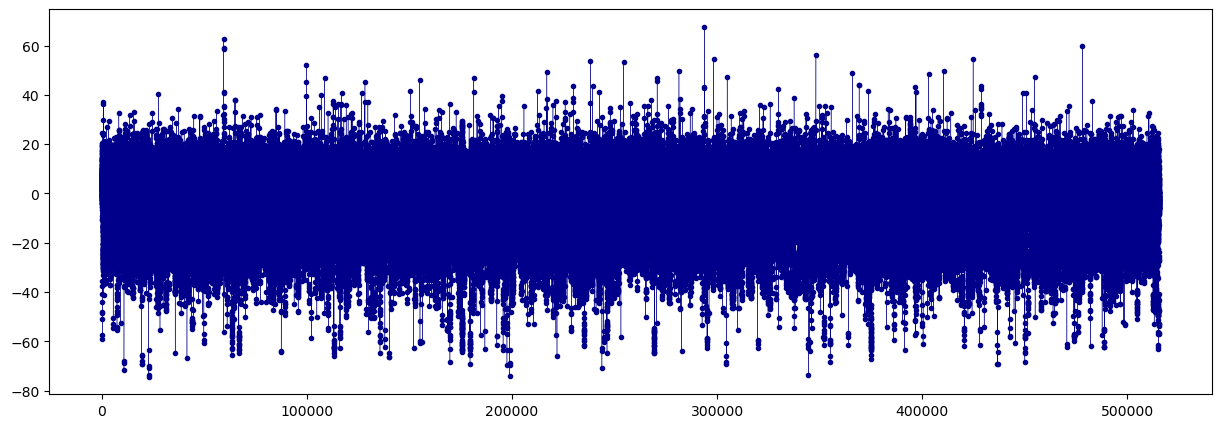

 
1. Prueba de Independencia
 
Estadístico de prueba Durbin-Watson: 0.7524705535561416
 
2. Prueba de Normalidad
 
Estadístico de prueba Shapiro-Wilk: 0.8978064060211182
Valor p: 0.0
 
3. Prueba de Homocedasticidad
 
Estadístico LM: 50654.011705195655
Valor p (LM): 0.0
Estadístico F: 1123.4006668990073
Valor p (F): 0.0
 
4. Prueba de Media cero
 
Estadístico de prueba t: -1.2403145314133183e-09
Valor p: 0.9999999990103727


In [30]:
# Obtener los residuos del modelo OLS
residuals = results_ols.resid

print("Gráfico de residuos")
plt.figure(figsize=(15,5))
plt.plot(residuals, '.-', color ="darkblue", linewidth=0.3)
plt.show()

print(" ")
print("1. Prueba de Independencia")
print(" ")

# Prueba de Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
durbin_watson_statistic = durbin_watson(residuals)
print("Estadístico de prueba Durbin-Watson:", durbin_watson_statistic)

print(" ")
print("2. Prueba de Normalidad")
print(" ")

# Prueba de normalidad de Shapiro-Wilk
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print("Estadístico de prueba Shapiro-Wilk:", stat)
print("Valor p:", p_value)

print(" ")
print("3. Prueba de Homocedasticidad")
print(" ")

# Prueba de Breusch-Pagan para la homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X_selected)
print("Estadístico LM:", lm)
print("Valor p (LM):", lm_p_value)
print("Estadístico F:", fvalue)
print("Valor p (F):", f_p_value)

print(" ")
print("4. Prueba de Media cero")
print(" ")

# Prueba de media cero
from scipy.stats import ttest_1samp
t_statistic, t_p_value = ttest_1samp(residuals, 0)
print("Estadístico de prueba t:", t_statistic)
print("Valor p:", t_p_value)

Análisis de las pruebas de supuestos:

1. Prueba de Independencia: El estadístico de prueba Durbin-Watson mide la autocorrelación de los residuos. Un valor cerca de 2 sugiere que no hay autocorrelación serial. Sin embargo, en este caso, el valor de 0.75 indica una posible autocorrelación positiva, pero está relativamente cerca de 2, y esto sugiere que la autocorrelación podría no ser tan grave. Sin embato, con esto se puede concluir que el modelo no cumple el supuesto de independencia

2. Prueba de Normalidad: Para ello se utiliza el Estadístico Shapiro-Wilk el cual evalúa la normalidad de los residuos. El valor p asociado es extremadamente pequeño (0.0), lo que indica que hay evidencia suficiente para rechazar la hipótesis nula de que los residuos se distribuyen normalmente. Por lo tanto, permite concluir que los residuos no se distribuyen de manera normal, o sea que tampoco se cumple el supuesto de normalidad

3. Prueba de Homocedasticidad: El Estadístico LM (Breusch-Pagan) de prueba evalúa la homocedasticidad de los residuos. el valor p resultante es muy pequeño (0.0) e indica que hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad. Esto significa que que la varianza de los errores no es constante a lo largo de los valores de las variables independientes, y por lo tanto no se cumple el supuesto de homocedasticidad

4. Prueba de media cero: Para ello se utiliza el Estadístico de prueba t. Esta prueba evalúa si la media de los residuos es cero. El valor p es extremadamente cercano a 1 (0.9999999990103727), lo que sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de que la media de los residuos es cero. Esto indica que la media de los residuos es cercana a cero y por lo tanto se cumple el supuesto de media cero.

### Modelo resultante ajustado (48 atributos escogidos)

Gráfico de residuos


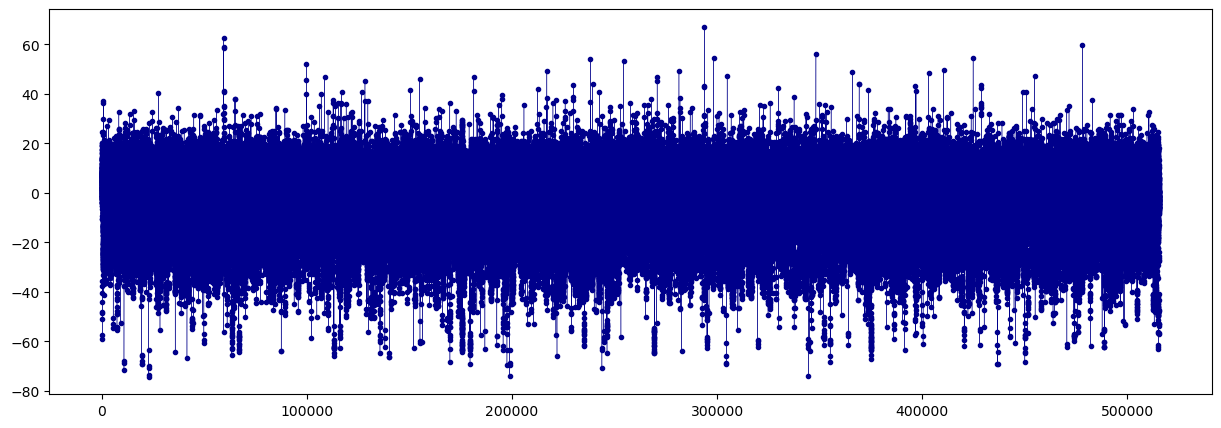

 
1. Prueba de Independencia
 
Estadístico de prueba Durbin-Watson: 0.7524743114967919
 
2. Prueba de Normalidad
 
Estadístico de prueba Shapiro-Wilk: 0.8978089094161987
Valor p: 0.0
 
3. Prueba de Homocedasticidad
 
Estadístico LM: 50652.99175398826
Valor p (LM): 0.0
Estadístico F: 1123.3755808023902
Valor p (F): 0.0
 
4. Prueba de Media cero
 
Estadístico de prueba t: 1.9177083282926196e-09
Valor p: 0.9999999984698908


In [31]:
# Obtener los residuos del modelo OLS
residuals_2 = results_ols_drop_26_77.resid

print("Gráfico de residuos")
plt.figure(figsize=(15,5))
plt.plot(residuals_2, '.-', color ="darkblue", linewidth=0.3)
plt.show()

print(" ")
print("1. Prueba de Independencia")
print(" ")

# Prueba de Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
durbin_watson_statistic = durbin_watson(residuals_2)
print("Estadístico de prueba Durbin-Watson:", durbin_watson_statistic)

print(" ")
print("2. Prueba de Normalidad")
print(" ")

# Prueba de normalidad de Shapiro-Wilk
from scipy.stats import shapiro
stat, p_value = shapiro(residuals_2)
print("Estadístico de prueba Shapiro-Wilk:", stat)
print("Valor p:", p_value)

print(" ")
print("3. Prueba de Homocedasticidad")
print(" ")

# Prueba de Breusch-Pagan para la homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals_2, X_selected)
print("Estadístico LM:", lm)
print("Valor p (LM):", lm_p_value)
print("Estadístico F:", fvalue)
print("Valor p (F):", f_p_value)

print(" ")
print("4. Prueba de Media cero")
print(" ")

# Prueba de media cero
from scipy.stats import ttest_1samp
t_statistic, t_p_value = ttest_1samp(residuals_2, 0)
print("Estadístico de prueba t:", t_statistic)
print("Valor p:", t_p_value)

Análisis de las pruebas de supuestos:

1. Prueba de Independencia: El estadístico de prueba Durbin-Watson mide la autocorrelación de los residuos. Un valor cerca de 2 sugiere que no hay autocorrelación serial. Sin embargo, en este caso, el valor de 0.75 indica una posible autocorrelación positiva, pero está relativamente cerca de 2, y esto sugiere que la autocorrelación podría no ser tan grave. Sin embato, con esto se puede concluir que el modelo no cumple el supuesto de independencia

2. Prueba de Normalidad: Para ello se utiliza el Estadístico Shapiro-Wilk el cual evalúa la normalidad de los residuos. El valor p asociado es extremadamente pequeño (0.0), lo que indica que hay evidencia suficiente para rechazar la hipótesis nula de que los residuos se distribuyen normalmente. Por lo tanto, permite concluir que los residuos no se distribuyen de manera normal, o sea que tampoco se cumple el supuesto de normalidad

3. Prueba de Homocedasticidad: El Estadístico LM (Breusch-Pagan) de prueba evalúa la homocedasticidad de los residuos. el valor p resultante es muy pequeño (0.0) e indica que hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad. Esto significa que que la varianza de los errores no es constante a lo largo de los valores de las variables independientes, y por lo tanto no se cumple el supuesto de homocedasticidad

4. Prueba de media cero: Para ello se utiliza el Estadístico de prueba t. Esta prueba evalúa si la media de los residuos es cero. El valor p es extremadamente cercano a 1 (0.9999999990103727), lo que sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de que la media de los residuos es cero. Esto indica que la media de los residuos es cercana a cero y por lo tanto se cumple el supuesto de media cero.

### Conclusión:

Ninguno de los dos modelos cumple con los supuestos, esto significa no sería conveniente utilizar ninguno de los modelos para predecir el año de grabación de la canción. por lo siguiente:

1. Ninguno cumple los supuestos y esto indica que los datos no siguen un comportamiento lineal ni un comportamiento normal y utilizar el modelo lineal para predecir una respuesta de Y con respecto a las variables X daría resultados errados con gran probabilidad
2. EL R cuadrado ajustado es muy pequeño de 0.22, por lo que solo 22% de los datos de y son explicados por las variables X en este modelo y eso indicaría que el resto de 78% de los datos no se explica por este modelo y eso es un gran porcentaje sin explicar.

por lo tanto, 

Validez del modelo: Dado que ninguno de los supuestos se cumple, la validez del modelo de regresión lineal se ve afectada. Esto significa que las estimaciones de los parámetros del modelo pueden ser sesgadas o inexactas, y las inferencias basadas en el modelo pueden ser poco confiables, debido a la posible no linealidad del modelo

Rendimiento predictivo limitado: Aunque el R cuadrado ajustado indica que aproximadamente el 22% de la variabilidad en la variable dependiente se explica por las variables independientes en el modelo, esto no necesariamente significa que el modelo tenga un buen rendimiento predictivo. Dado que los supuestos no se cumplen, es posible que el modelo no pueda generalizarse bien a nuevos datos y que las predicciones del modelo sean poco confiables, además de que el R cuadrado ajustado es muy bajito y el porcentaje que puede explicarse es bajo.

Necesidad de explorar otras técnicas de modelado: Dada la falta de validez del modelo de regresión lineal, sería recomendable explorar otras técnicas de modelado que puedan ser más apropiadas para los datos. Esto podría incluir métodos no lineales, como regresión de árboles de decisión, o modelos de aprendizaje automático más avanzados como bosques aleatorios o redes neuronales, que depronto puedan aproximarse más al comportamiento de los datos.